<a href="https://colab.research.google.com/github/Shamil2007/Machine-Learning/blob/main/telco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/Telco_Customer_Churn_Dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#Exploring Data

In [5]:
df = df.drop('customerID', axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


There aro no missing values in the given dataset

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
def to_float(row):
    row['TotalCharges'] = float(row['TotalCharges']) if row['TotalCharges'].strip() else float('nan')
    return row

df = df.apply(to_float, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


As we can observe, after converting the float values, some columns have become null.

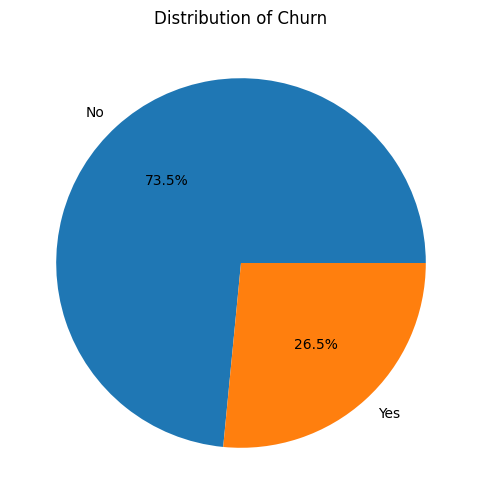

In [10]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Churn')

plt.show()

The dataset is imbalanced because one class is much larger than the other

#Data Analysis

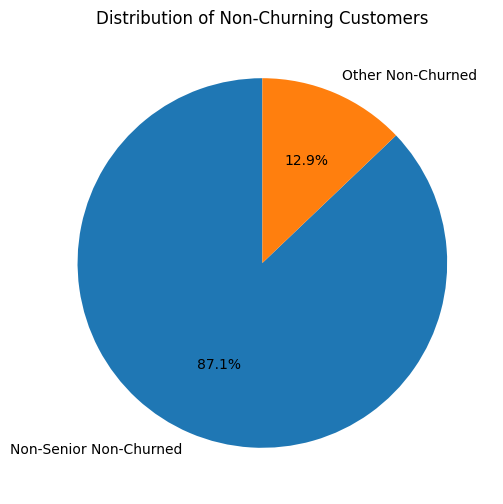

In [11]:
non_churning_non_senior = df[(df['Churn'] == 'No') & (df['SeniorCitizen'] == 0)].shape[0]

total_non_churning = df[df['Churn'] == 'No'].shape[0]

labels = ['Non-Senior Non-Churned', 'Other Non-Churned']
sizes = [non_churning_non_senior, total_non_churning - non_churning_non_senior]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Non-Churning Customers')
plt.show()


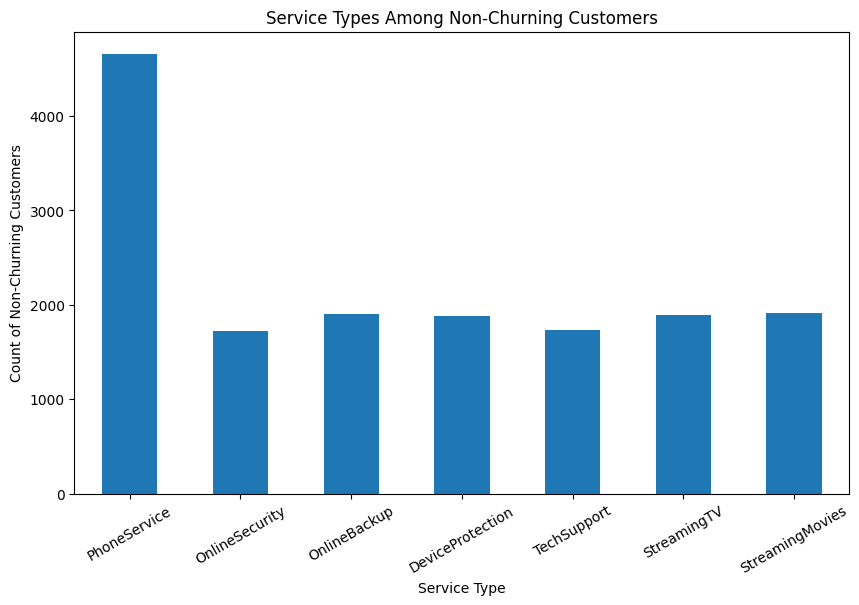

In [12]:
service_columns = ['PhoneService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

non_churning_df = df[df['Churn'] == 'No']

service_counts = non_churning_df[service_columns].apply(lambda x: (x == 'Yes').sum())

plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar')
plt.title('Service Types Among Non-Churning Customers')
plt.ylabel('Count of Non-Churning Customers')
plt.xlabel('Service Type')

plt.xticks(rotation=30)
plt.show()

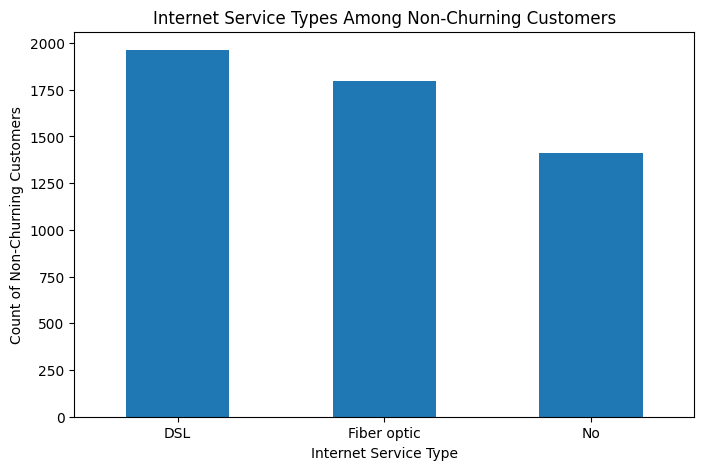

In [13]:
non_churning_df = df[df['Churn'] == 'No']

internet_service_counts = non_churning_df['InternetService'].value_counts()

plt.figure(figsize=(8, 5))
internet_service_counts.plot(kind='bar')
plt.title('Internet Service Types Among Non-Churning Customers')
plt.ylabel('Count of Non-Churning Customers')
plt.xlabel('Internet Service Type')
plt.xticks(rotation=0)

plt.show()

#Feature engineering

In [14]:
df["AvgMonthlySpend"] = round(df["TotalCharges"] / df["tenure"], 2)

In [15]:
df['MonthlyChargeLevel'] = pd.cut(df['MonthlyCharges'], bins=[0, 50, 100, float('inf')], labels=['Low', 'Medium', 'High']).astype(str)

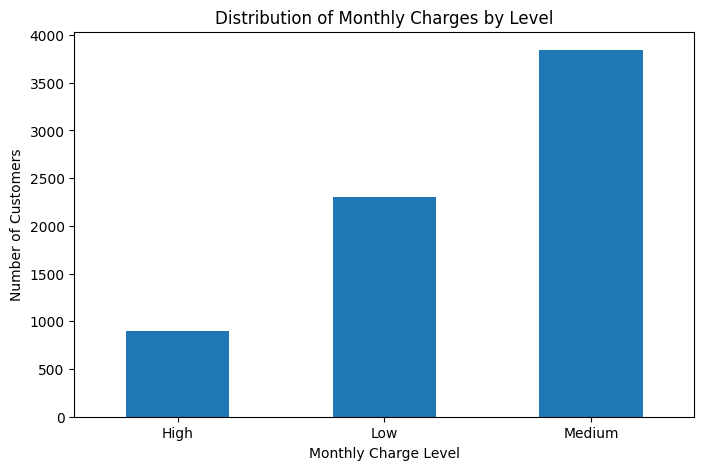

In [16]:
monthly_charge_counts = df['MonthlyChargeLevel'].value_counts().sort_index()


plt.figure(figsize=(8, 5))
monthly_charge_counts.plot(kind='bar')
plt.title('Distribution of Monthly Charges by Level')
plt.xlabel('Monthly Charge Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

plt.show()

#Splitting Data

In [17]:
X = df.drop('Churn', axis = 1)
y = df['Churn'].copy()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
X_num_train = X_train.select_dtypes(include = np.number)
X_cat_train = X_train.select_dtypes(include = 'object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              7043 non-null   object 
 1   SeniorCitizen       7043 non-null   int64  
 2   Partner             7043 non-null   object 
 3   Dependents          7043 non-null   object 
 4   tenure              7043 non-null   int64  
 5   PhoneService        7043 non-null   object 
 6   MultipleLines       7043 non-null   object 
 7   InternetService     7043 non-null   object 
 8   OnlineSecurity      7043 non-null   object 
 9   OnlineBackup        7043 non-null   object 
 10  DeviceProtection    7043 non-null   object 
 11  TechSupport         7043 non-null   object 
 12  StreamingTV         7043 non-null   object 
 13  StreamingMovies     7043 non-null   object 
 14  Contract            7043 non-null   object 
 15  PaperlessBilling    7043 non-null   object 
 16  Paymen

#Data Preprocessing

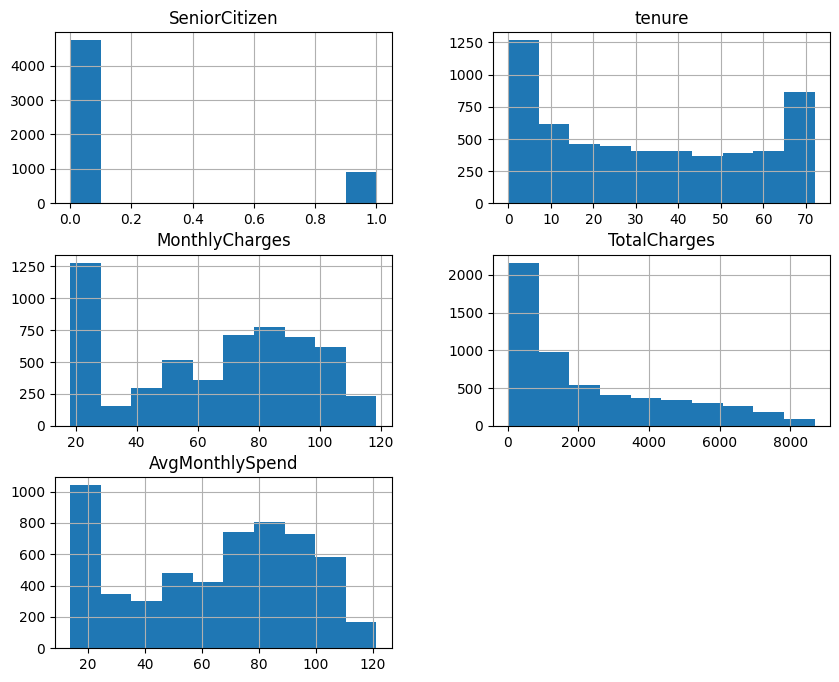

In [21]:
X_num_train.hist(figsize=(10, 8));

In [22]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [23]:
X_num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
])

X_num_log_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('Log', FunctionTransformer(np.log1p, feature_names_out = "one-to-one")),
    ('scale', StandardScaler()),
])

X_cat_pipeline = Pipeline([
    ('imputer_cat', SimpleImputer(strategy = 'most_frequent')),
    ('Encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

transformer = ColumnTransformer([
    ('log', X_num_log_pipeline, ['tenure', 'TotalCharges']),
    ('num', X_num_pipeline, X_num_train.drop(columns=['tenure', 'TotalCharges']).columns),
    ('cat', X_cat_pipeline, X_cat_train.columns)
], remainder = 'passthrough')

#Model Selection


In [24]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [25]:
full_pipeline_logistic = Pipeline([
    ('preprocessing', transformer),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('lr', LogisticRegression(random_state = 42))
])

full_pipeline_logistic.fit(X_train, y_train)
print(f"Train score: {full_pipeline_logistic.score(X_train, y_train)}, Test score: {full_pipeline_logistic.score(X_test, y_test)}")

Train score: 0.8022719204827831, Test score: 0.8112136266855926


In [26]:
from sklearn.svm import SVC

In [27]:
full_pipeline_svc = Pipeline([
    ('preprocessing', transformer),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('svc', SVC(random_state = 42))
])

full_pipeline_svc.fit(X_train, y_train)
print(f"Train score: {full_pipeline_svc.score(X_train, y_train)}, Test score: {full_pipeline_svc.score(X_test, y_test)}")

Train score: 0.8201987930422435, Test score: 0.8097941802696949


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
full_pipeline_forest = Pipeline([
    ('preprocessing', transformer),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('forest', RandomForestClassifier(random_state = 42))
])

full_pipeline_forest.fit(X_train, y_train)
print(f"Train score: {full_pipeline_forest.score(X_train, y_train)}, Test score: {full_pipeline_forest.score(X_test, y_test)}")

Train score: 0.9984025559105432, Test score: 0.7955997161107168


#Fine-tuning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
params_forest = {
    'forest__n_estimators': [45, 50, 55],
    'forest__criterion': ['gini', 'entropy'],
    'forest__max_depth': [5, 6, 7],
    'forest__min_samples_split': [2, 3, 4],
    'forest__min_samples_leaf': [2, 3, 4],
    'forest__n_jobs': [-1]
}

grid_forest = GridSearchCV(full_pipeline_forest, params_forest, cv=3)
grid_forest.fit(X_train, y_train)

print("Best parameters:", grid_forest.best_params_)

Best parameters: {'forest__criterion': 'gini', 'forest__max_depth': 6, 'forest__min_samples_leaf': 2, 'forest__min_samples_split': 2, 'forest__n_estimators': 45, 'forest__n_jobs': -1}


In [32]:
grid_forest.best_estimator_.fit(X_train, y_train)
print(f"Train score: {grid_forest.best_estimator_.score(X_train, y_train)}, Test score: {grid_forest.best_estimator_.score(X_test, y_test)}")

Train score: 0.806354277600284, Test score: 0.8190205819730305


In [33]:
from sklearn.ensemble import VotingClassifier

In [34]:
voting_clf = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 42)),
        ('rf', RandomForestClassifier(random_state = 42,
                                      criterion = 'gini',
                                      max_depth = 6,
                                      min_samples_leaf = 4,
                                      n_estimators = 55)),
        ('svc', SVC(random_state = 42, probability = True))
    ]
)

voting_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('voting', voting_clf)
])

voting_pipeline.fit(X_train, y_train)
print(f"Train score: {voting_pipeline.score(X_train, y_train)}, Test score: {voting_pipeline.score(X_test, y_test)}")

Train score: 0.8143414980475683, Test score: 0.8126330731014905


In [35]:
voting_predict = voting_pipeline.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, voting_predict))

              precision    recall  f1-score   support

          No       0.87      0.88      0.87      1036
         Yes       0.65      0.63      0.64       373

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.76      1409
weighted avg       0.81      0.81      0.81      1409

